In [1]:
# Import libraries
'''Basic'''
import numpy as np
import pandas as pd

'''Data Visualization'''
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette() 

%matplotlib inline

'''Data Preparation and Model Evaluation'''
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

'''Algorithms'''
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist

In [2]:
# Just to filter out warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load dataset
file_path = "../data/LoanStats.csv"
data = pd.read_csv(file_path)

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(42542, 145)

In [6]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [7]:
# Sets the pandas dataframe options to display all columns/rows
pd.options.display.max_columns = None

data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,NaN,Jun-18,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3

The original loan data file has 145 columns, but most of these columns are empty and are of little value to us. Therefore, we will designate a subset of the columns that are mostly populated and are worth using in our clustering application. These fields include attributes of the loan such as the amount requested, the amount funded, the term, the interest rate, the loan grade, etc., and attributes of the borrower such as employment length, home ownership status, annual income, address, and purpose for borrowing money.

In [8]:
# Select columns to keep
columnsToKeep = ['loan_amnt','funded_amnt','funded_amnt_inv','term', \
                 'int_rate','installment','grade','sub_grade', \
                 'emp_length','home_ownership','annual_inc', \
                 'verification_status','pymnt_plan','purpose', \
                 'addr_state','dti','delinq_2yrs','earliest_cr_line', \
                 'mths_since_last_delinq','mths_since_last_record', \
                 'open_acc','pub_rec','revol_bal','revol_util', \
                 'total_acc','initial_list_status','out_prncp', \
                 'out_prncp_inv','total_pymnt','total_pymnt_inv', \
                 'total_rec_prncp','total_rec_int','total_rec_late_fee', \
                 'recoveries','collection_recovery_fee','last_pymnt_d', \
                 'last_pymnt_amnt']

data = data.loc[:,columnsToKeep]

In [9]:
data.shape

(42542, 37)

In [10]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,Jan-85,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,Apr-99,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,Nov-01,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,n,other,CA,20.00,0.0,Feb-96,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,n,other,OR,17.94,0.0,Jan-96,38.0,NaN,15.0,0.0,27783.0,53.90%,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30


In [11]:
data.grade.value_counts()

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

Text(0.5, 15.0, '')

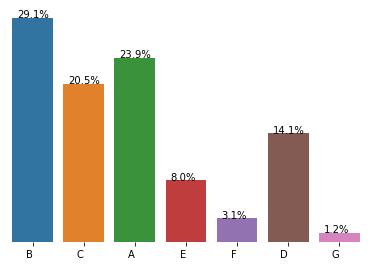

In [12]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = "grade", data = data)
total = len(data.grade)

ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.tight_layout()


for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

# Remove labels
ax.set_ylabel('')    
ax.set_xlabel('')

### Trasnform String Format to Numerical Format
A few of the features—the term of the loan, the interest rate of the loan, employment length of the borrower, and revolving utilization of the borrower— need to be altered from a string format to a numerical format. 

In [13]:
# Import regular expression matching operations for patterns and strings
import re

In [14]:
# Transform features from string to numeric
for i in ["term","int_rate","emp_length","revol_util"]:
    data.loc[:,i] = data.loc[:,i].apply(lambda x: re.sub("[^0-9]", "", str(x)))
    data.loc[:,i] = pd.to_numeric(data.loc[:,i])

For our clustering application, we will consider just the numerical features and ignore all the categorical features 

In [15]:
# Determine which features are numerical
numerical_features = [x for x in data.columns if data[x].dtype != 'object']

In [16]:
# Display NaNs by feature
nan_counter = np.isnan(data.loc[:,numerical_features]).sum()
nan_counter

loan_amnt                      7
funded_amnt                    7
funded_amnt_inv                7
term                           7
int_rate                       7
installment                    7
emp_length                  1119
annual_inc                    11
dti                            7
delinq_2yrs                   36
mths_since_last_delinq     26933
mths_since_last_record     38891
open_acc                      36
pub_rec                       36
revol_bal                      7
revol_util                    97
total_acc                     36
out_prncp                      7
out_prncp_inv                  7
total_pymnt                    7
total_pymnt_inv                7
total_rec_prncp                7
total_rec_int                  7
total_rec_late_fee             7
recoveries                     7
collection_recovery_fee        7
last_pymnt_amnt                7
dtype: int64

In [17]:
# Import imputation transformer for completing missing values
from sklearn.impute import SimpleImputer

In [18]:
# Impute NaNs with mean 
fill_mean = ['loan_amnt','funded_amnt','funded_amnt_inv','term', \
                'int_rate','installment','emp_length','annual_inc',\
                'dti','open_acc','revol_bal','revol_util','total_acc',\
                'out_prncp','out_prncp_inv','total_pymnt', \
                'total_pymnt_inv','total_rec_prncp','total_rec_int', \
                'last_pymnt_amnt']

# Impute NaNs with zero
fill_zero = ['delinq_2yrs','mths_since_last_delinq', \
                'mths_since_last_record','pub_rec','total_rec_late_fee', \
                'recoveries','collection_recovery_fee']

# Perform imputation
imputer = SimpleImputer(strategy='mean')   
data.loc[:,fill_mean] = imputer.fit_transform(data[fill_mean])

data.loc[:,fill_zero] = data.loc[:,fill_zero].fillna(value=0,axis=1)

In [19]:
# Check for NaNs one last time
nan_counter = np.isnan(data.loc[:, numerical_features]).sum()
nan_counter

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
emp_length                 0
annual_inc                 0
dti                        0
delinq_2yrs                0
mths_since_last_delinq     0
mths_since_last_record     0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
dtype: int64

In [20]:
# Feature engineering
data['installmentOverLoanAmnt'] = data.installment/data.loan_amnt
data['loanAmntOverIncome'] = data.loan_amnt/data.annual_inc
data['revol_balOverIncome'] = data.revol_bal/data.annual_inc
data['totalPymntOverIncome'] = data.total_pymnt/data.annual_inc
data['totalPymntInvOverIncome'] = data.total_pymnt_inv/data.annual_inc
data['totalRecPrncpOverIncome'] = data.total_rec_prncp/data.annual_inc
data['totalRecIncOverIncome'] = data.total_rec_int/data.annual_inc

new_feats = ['installmentOverLoanAmnt','loanAmntOverIncome', \
            'revol_balOverIncome','totalPymntOverIncome', \
           'totalPymntInvOverIncome','totalRecPrncpOverIncome', \
            'totalRecIncOverIncome']

Next, we will generate the training dataframe and scale the features for our clustering algorithms:

In [21]:
# Select features for training
numerical_plus_new_feats = numerical_features + new_feats
X_train = data.loc[:, numerical_plus_new_feats]

# Scale data
scaler = StandardScaler()
X_train.loc[:,:] = scaler.fit_transform(X_train)

In [22]:
X_train.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'installmentOverLoanAmnt',
       'loanAmntOverIncome', 'revol_balOverIncome', 'totalPymntOverIncome',
       'totalPymntInvOverIncome', 'totalRecPrncpOverIncome',
       'totalRecIncOverIncome'],
      dtype='object')

In order to judge the goodness of our clustering algorithm at finding distinct and homogeneous groups of borrowers in this Lending Club Dataset, we will use the loan grade as a proxy label. The loan grade is currently graded by letters, with loan grade “A” as the most credit-worthy and safe and loan grade “G” as the least:

In [23]:
# Designate labels for evaluation
labels = data.grade
labels.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G', nan], dtype=object)

There are some NaNs in the loan grade. We will fill these with a value of “Z” and then use the LabelEncoder from Scikit-Learn to transform the letter grades to numerical grades. To remain consistent, we will load these labels into a “y_train” Python series:

In [24]:
# Fill missing labels
labels = labels.fillna(value="Z")

# Convert labels to numerical values
label_cod = LabelEncoder()
label_cod.fit(list(labels.values))
labels = pd.Series(data=label_cod.transform(labels.values), name="grade")

# Store as y_train
y_train = labels

In [25]:
labels_originals_vs_new = pd.concat([labels, data.grade],axis=1)
labels_originals_vs_new

,grade,grade
0,1,B
1,2,C
2,2,C
3,2,C
4,1,B
...,...,...
42537,0,A
42538,7,NaN
42539,7,NaN
42540,7,NaN


In [26]:
# Compare loan grades with interest rates
interest_and_grade = pd.DataFrame(data=[data.int_rate,labels])
interest_and_grade = interest_and_grade.T

interest_and_grade.groupby("grade").mean()

,int_rate
grade,
0.0,734.270844
1.0,1101.420857
2.0,1349.988902
3.0,1557.714927
4.0,1737.676783
5.0,1926.530361
6.0,2045.125000
7.0,1216.501563


In [27]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,installmentOverLoanAmnt,loanAmntOverIncome,revol_balOverIncome,totalPymntOverIncome,totalPymntInvOverIncome,totalRecPrncpOverIncome,totalRecIncOverIncome
0,-0.821798,-0.814636,-0.724301,-0.590694,-0.408626,-0.764707,1.471829,-0.704298,2.122752,-0.297382,-0.593132,-0.235401,-1.411549,-0.236582,-0.029517,1.289979,-1.132609,0.0,0.0,-0.677052,-0.606224,-0.658075,-0.532658,-0.193712,-0.139866,-0.088594,-0.556857,0.496911,0.191382,1.663367,0.318077,0.398856,0.418444,-0.013688
1,-1.159169,-1.164470,-1.071381,1.693204,0.837468,-1.257939,-1.201679,-0.610676,-1.839671,-0.297382,-0.593132,-0.235401,-1.411549,-0.236582,-0.572795,-1.140078,-1.564098,0.0,0.0,-1.210236,-1.139479,-1.297552,-0.698236,-0.193712,0.027213,-0.081748,-0.568707,-1.251238,-0.884205,-0.714896,-1.188170,-1.107276,-1.309053,-0.578048
2,-1.172664,-1.178463,-1.085404,-0.590694,1.023573,-1.140663,1.471829,-0.887610,-0.691832,-0.297382,-0.593132,-0.235401,-1.634052,-0.236582,-0.515156,1.774028,-1.046311,0.0,0.0,-0.991279,-0.919160,-1.024010,-0.632274,-0.193712,-0.139866,-0.088594,-0.447774,1.015469,0.084280,0.143866,0.325393,0.415007,0.307102,0.340544
3,-0.147056,-0.114968,-0.019624,-0.590694,0.357371,0.079877,1.471829,-0.311084,0.985321,-0.297382,1.022624,-0.235401,0.145973,-0.236582,-0.395154,-1.440646,1.283732,0.0,0.0,0.023293,0.101718,0.045647,-0.009696,1.973773,-0.139866,-0.088594,-0.514468,0.771412,0.147659,-0.447813,0.348974,0.438722,0.372990,0.224416
4,-1.091695,-1.094503,-1.001264,1.693204,0.141597,-1.219836,-1.201679,0.169510,0.679032,-0.297382,1.161117,-0.235401,1.258489,-0.236582,0.612505,0.315340,1.370030,0.0,0.0,-0.874578,-0.801734,-0.939564,-0.453832,-0.193712,-0.139866,-0.088594,-0.580649,-1.521356,-1.278586,0.635921,-1.066380,-0.984785,-1.109710,-0.608799


In [28]:
y_train.value_counts()

1    12389
0    10183
2     8740
3     6016
4     3394
5     1301
6      512
7        7
Name: grade, dtype: int64

In [29]:
# Clusters
def analyzeCluster(clusterDF, labelsDF):
    countByCluster = pd.DataFrame(data=clusterDF['cluster'].value_counts())
    countByCluster.reset_index(inplace=True,drop=False)
    countByCluster.columns = ['cluster','clusterCount']
        
    preds = pd.concat([labelsDF,clusterDF], axis=1)
    preds.columns = ['trueLabel','cluster']
    
    countByLabel = pd.DataFrame(data=preds.groupby('trueLabel').count())
        
    countMostFreq = pd.DataFrame(data=preds.groupby('cluster').agg( \
        lambda x:x.value_counts().iloc[0]))
    countMostFreq.reset_index(inplace=True,drop=False)
    countMostFreq.columns = ['cluster','countMostFrequent']
    
    accuracyDF = countMostFreq.merge(countByCluster, \
        left_on="cluster",right_on="cluster")
    
    overallAccuracy = accuracyDF.countMostFrequent.sum()/ \
        accuracyDF.clusterCount.sum()
    
    accuracyByLabel = accuracyDF.countMostFrequent/ \
        accuracyDF.clusterCount
    
    return countByCluster, countByLabel, countMostFreq, \
        accuracyDF, overallAccuracy, accuracyByLabel

In [30]:
# K-means Applications
from sklearn.cluster import KMeans

n_clusters = 10
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2020
n_jobs = 2

kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
                max_iter=max_iter, tol=tol, \
                random_state=random_state, n_jobs=n_jobs)

kMeans_inertia = pd.DataFrame(data=[],index=range(10,31), \
                              columns=['inertia'])

overallAccuracy_kMeansDF = pd.DataFrame(data=[], \
    index=range(10,31),columns=['overallAccuracy'])

for n_clusters in range(10,31):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
                    max_iter=max_iter, tol=tol, \
                    random_state=random_state, n_jobs=n_jobs)

    kmeans.fit(X_train)
    kMeans_inertia.loc[n_clusters] = kmeans.inertia_
    X_train_kmeansClustered = kmeans.predict(X_train)
    X_train_kmeansClustered = pd.DataFrame(data= \
        X_train_kmeansClustered, index=X_train.index, \
        columns=['cluster'])
    
    countByCluster_kMeans, countByLabel_kMeans, \
    countMostFreq_kMeans, accuracyDF_kMeans, \
    overallAccuracy_kMeans, accuracyByLabel_kMeans = \
    analyzeCluster(X_train_kmeansClustered, y_train)
    
    overallAccuracy_kMeansDF.loc[n_clusters] = \
        overallAccuracy_kMeans

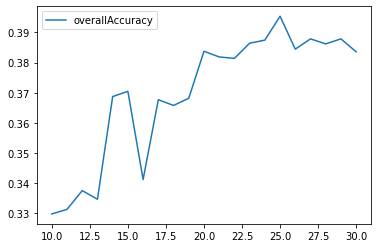

In [31]:
overallAccuracy_kMeansDF.plot()

In [32]:
accuracyByLabel_kMeans

0     0.315513
1     0.368587
2     0.343034
3     0.315978
4     0.484147
5     0.607160
6     0.327456
7     0.376534
8     0.228972
9     0.266667
10    0.308027
11    0.332953
12    0.234568
13    0.234471
14    0.285036
15    0.500000
16    0.347085
17    0.323566
18    0.257848
19    0.323651
20    0.288824
21    0.297619
22    0.205882
23    0.389203
24    0.252252
25    0.236364
26    0.704593
27    0.280242
28    0.260745
29    0.390438
dtype: float64

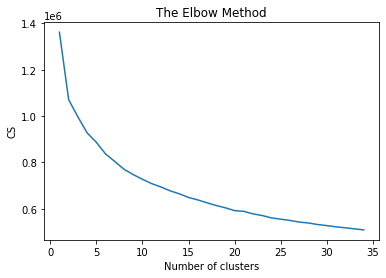

In [42]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 35):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 35), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [33]:
# Hierarchical Clustering Application
import fastcluster
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z = fastcluster.linkage_vector(X_train, method='ward', metric='euclidean')

Z_dataFrame = pd.DataFrame(data=Z,columns=['clusterOne',
                                           'clusterTwo',
                                           'distance',
                                           'newClusterSize'])
Z_dataFrame[:20]

,clusterOne,clusterTwo,distance,newClusterSize
0,39786.0,39787.0,0.000000e+00,2.0
1,39788.0,42542.0,0.000000e+00,3.0
2,42538.0,42539.0,0.000000e+00,2.0
3,42540.0,42544.0,0.000000e+00,3.0
4,42541.0,42545.0,3.399350e-17,4.0
5,42543.0,42546.0,5.139334e-17,7.0
6,33251.0,33261.0,1.561313e-01,2.0
7,42512.0,42535.0,3.342654e-01,2.0
8,42219.0,42316.0,3.368231e-01,2.0
9,6112.0,21928.0,3.384368e-01,2.0


In [34]:
Z_dataFrame[42521:]

,clusterOne,clusterTwo,distance,newClusterSize
42521,85038.0,85043.0,132.715723,3969.0
42522,85051.0,85052.0,141.386569,2899.0
42523,85026.0,85027.0,146.976703,2351.0
42524,85048.0,85049.0,152.660192,5691.0
42525,85036.0,85059.0,153.512281,5956.0
42526,85033.0,85044.0,160.825959,2203.0
42527,85055.0,85061.0,163.701428,668.0
42528,85062.0,85066.0,168.199295,6897.0
42529,85054.0,85060.0,168.924039,9414.0
42530,85028.0,85064.0,185.215769,3118.0


In [35]:
Z

array([[3.97860000e+04, 3.97870000e+04, 0.00000000e+00, 2.00000000e+00],
       [3.97880000e+04, 4.25420000e+04, 0.00000000e+00, 3.00000000e+00],
       [4.25380000e+04, 4.25390000e+04, 0.00000000e+00, 2.00000000e+00],
       ...,
       [8.50740000e+04, 8.50790000e+04, 3.75698458e+02, 3.48700000e+04],
       [8.50650000e+04, 8.50800000e+04, 4.00711547e+02, 3.72210000e+04],
       [8.50760000e+04, 8.50810000e+04, 6.44047472e+02, 4.25420000e+04]])

In [36]:
from scipy.cluster.hierarchy import fcluster

distance_threshold = 100
clusters = fcluster(Z, distance_threshold, criterion='distance')
X_train_hierClustered = pd.DataFrame(data=clusters, \
    index=X_train.index,columns=['cluster'])

In [37]:
print("Number of distinct clusters: ", \
      len(X_train_hierClustered['cluster'].unique()))

Number of distinct clusters:  32


In [38]:
countByCluster_hierClust, countByLabel_hierClust, \
    countMostFreq_hierClust, accuracyDF_hierClust, \
    overallAccuracy_hierClust, accuracyByLabel_hierClust = \
    analyzeCluster(X_train_hierClustered, y_train)

print("Overall accuracy from hierarchical clustering: ", \
      overallAccuracy_hierClust)

Overall accuracy from hierarchical clustering:  0.3651685393258427


In [39]:
print("Accuracy by cluster for hierarchical clustering")
accuracyByLabel_hierClust

Accuracy by cluster for hierarchical clustering


0     0.304124
1     0.219001
2     0.228311
3     0.379722
4     0.240064
5     0.272011
6     0.314560
7     0.263930
8     0.246138
9     0.318942
10    0.302752
11    0.269772
12    0.335717
13    0.330403
14    0.346320
15    0.440141
16    0.744155
17    0.502227
18    0.294118
19    0.236111
20    0.254727
21    0.241042
22    0.317979
23    0.308771
24    0.284314
25    0.243243
26    0.500000
27    0.289157
28    0.365283
29    0.479693
30    0.393559
31    0.340875
dtype: float64

In [40]:
# HDBSCAN application
import hdbscan

min_cluster_size = 20
min_samples = 20
alpha = 1.0
cluster_selection_method = 'leaf'

hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, \
    min_samples=min_samples, alpha=alpha, \
    cluster_selection_method=cluster_selection_method)

X_train_hdbscanClustered = hdb.fit_predict(X_train)
X_train_hdbscanClustered = pd.DataFrame(data= \
    X_train_hdbscanClustered, index=X_train.index, \
    columns=['cluster'])

countByCluster_hdbscan, countByLabel_hdbscan, \
    countMostFreq_hdbscan, accuracyDF_hdbscan, \
    overallAccuracy_hdbscan, accuracyByLabel_hdbscan = \
    analyzeCluster(X_train_hdbscanClustered, y_train)

In [43]:
print("Overall accuracy from HDBSCAN: ", overallAccuracy_hdbscan)

Overall accuracy from HDBSCAN:  0.3246203751586667


In [44]:
print("Cluster results for HDBSCAN")
countByCluster_hdbscan

Cluster results for HDBSCAN


,cluster,clusterCount
0,-1,32708
1,7,4070
2,2,3668
3,1,1096
4,4,773
5,0,120
6,6,49
7,3,38
8,5,20


In [45]:
accuracyByLabel_hdbscan

0    0.284487
1    0.341667
2    0.414234
3    0.332061
4    0.552632
5    0.438551
6    0.400000
7    0.408163
8    0.590663
dtype: float64

In [46]:
from sklearn.cluster import MiniBatchKMeans

In [47]:
init = 'k-means++'
n_clusters = 30 
batch_size = 45


model = MiniBatchKMeans(init = init,
                        n_clusters = n_clusters,
                        batch_size = batch_size,
                        n_init=10,
                        max_no_improvement=10,
                        verbose=0
                       )

X_train_batch = model.fit_predict(X_train)
X_train_batch = pd.DataFrame(data= \
    X_train_batch, index=X_train.index, \
    columns=['cluster'])

countByCluster_batch, countByLabel_batch, \
    countMostFreq_batch, accuracyDF_batch, \
    overallAccuracy_batch, accuracyByLabel_batch = \
    analyzeCluster(X_train_batch, y_train)

In [48]:
overallAccuracy_batch

0.3859950166893893

In [49]:
print("Cluster results for MiniBatchKMeans")
countByCluster_batch

Cluster results for MiniBatchKMeans


,cluster,clusterCount
0,3,3946
1,13,2977
2,4,2923
3,24,2833
4,29,2716
5,27,2489
6,19,2125
7,5,2046
8,11,2030
9,8,1868


In [ ]:
# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

n_clusters = 30
affinity = "euclidean"
linkage = "ward"

model_agg_cluster = AgglomerativeClustering(n_clusters = n_clusters,
                                            affinity = affinity, 
                                            linkage = linkage)

X_train_agg_cluster = model_agg_cluster.fit_predict(X_train)
X_train_agg_cluster = pd.DataFrame(data = X_train_agg_cluster,
                                   index = X_train.index,
                                   columns = ['cluster'])

In [1]:
from sklearn.cluster import OPTICS

In [ ]:
model = OPTICS(eps=0.3)

X_train_optics = model.fit_predict(X_train)
X_train_optics = pd.DataFrame(data= \
    X_train_optics, index = X_train.index, \
    columns=['cluster'])

countByCluster_optics, countByLabel_optics, \
    countMostFreq_optics, accuracyDF_optics, \
    overallAccuracy_optics, accuracyByLabel_optics = \
    analyzeCluster(X_train_optics, y_train)

In [ ]:
countByCluster_agg, countByLabel_agg, \
    countMostFreq_agg, accuracyDF_agg, \
    overallAccuracy_agg, accuracyByLabel_agg = \
    analyzeCluster(X_train_agg_cluster, y_train)